In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Table of contents
1. Introduction<br>
  1.1 Topic of this investigation<br> 
  1.2 Datasets used <br>
  1.3 Definition of "Happiness Score", "Human Development Index" and "Gini Coefficient"<br>
  
2. Data Cleaning<br>
  2.1 Data overview<br>
  2.2 Data issues to be aware of<br>
  2.3 Preparation of the Happiness data set<br>
  2.4 Building a reusable function to turn data from wide to long format<br>
  2.5 Investigating for missing data<br>
  2.6 Building a reusable function to check for NaN values<br>
  2.7 Conclusion missing data: Enough Happiness data to procede?<br>
  2.8 Preparation of the HDI data<br>
  2.9 Are the HDI data complete enough?<br>
  2.10 Preperation of the Gini Set<br>
3. Exploratory Data Analysis (EDA) of the Happiness Dataset<br>
  3.1 Explanation of the metrics used<br>
  3.2 Preparing the Happiness Data for EDA<br>
  3.3 Happy or less happy?<br>
  3.4 Which countries are less happier at last measurement then at first measurement? <br>
  3.5 Which country holds the all time "high" in terms of Happiness Score?<br>
  3.6 Which country is the happiest in the world now?<br>
  3.7 Excursus: Are Scandinavians generally happier people?<br>
  3.8 Top 10 of Happy Nations.<br>
  3.9 Conclusion Excursus<br>
  3.10 Which country has developed the most regarding HS from first to last value?<br>
  3.11 Which country has the largest difference from lowest to highest value? <br>
  3.12 Conclusion EDA of Happiness 
4. Investigation of Happiness, Gini and HDI<br>
  4.1 Preparing HDI and Gini Sets analogous to the Happiness set.<br>
  4.2 Losing country-rows by dropping NaN values and performing an inner merge<br>
  4.3 The correlation of Happiness and HDI and overall correlation<br>
  4.4 Correlation between HS and HDI in the four quartile ranges<br>
  4.5 Conclusion HDI and Happiness Correlation<br>
  4.6 Gini and Happiness (Overall Correlation)<br>
5. Summary<br>
6. What's missing?<br>
7. What's nex?<br>

# 1.  "Happy nations": Which factors contribute to the Happiness Score?

### 1. 1 Questions

The times we are experiencing are special: climate change and the rise of right-wing populism threatening our species as a whole and our democracy in special. I am convinced, that "happy societies" are more reasonable and therefore willing to do "the right thing". **Finding out which factors contributes to "Happy nations" is crucial for building stable and reasonable societies**. This investigation should serve as a starting point by answering these questions:
1. Which factor is stronger correlated with the Happiness Score: Equality (Gini) or the combined value of life expectation, income, and education (HDI)?
2. Do the influence of these factors (HDI / Gini) differ in their impact on the Happiness Score depending on the quartile? (Does the HDI makes more difference in the Happiness Score when in the fourth, than in the first quartile?)
But first I want to gain an intuitive understanding of "what is a happy nation"? So I will find out:
3. Which is the happiest country in the world now (And which Gini and HDI values do they have?
4. What is the "all-time high" in terms of Happiness Score? **What can other countries learn from this country?**
5. Which country has developed the most in terms of Happiness from the first to the last year measured? **This could be answering the question of "how to improve happiness. Fast" (Since the first year measured is 2005 in a further investigation.** 
6. Which country has the most "drama": The population of which country experiences the greatest difference between the highest and lowest value measured? **This could show which factors contribute to rising and declining happiness.** 


### 1.2 Datasets used
For this project I make use of three datasets from **Gapminder**: 
- The **Human Development Index (HDI)**, 
- the **Happiness Score (HS)** 
- and the **Gini Coefficient (Gini)**

<br>
These sets provide data for more than 100 countries and for up to 50 years of measurement. However, these sets are not complete. I will tackle this issue in section 2. 
<br>

### 1.3 A short explanation of the three indicators.

#### Explanation of the Happiness Score (HS) ###
The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to **rate their own current lives on that 0 to 10 scale**.[15] The report correlates the life evaluation results with various life factors<br>
[Wikipedia](https://en.wikipedia.org/wiki/World_Happiness_Report)

#### The Human Development Index  (HDI) ###
The Human Development Index (HDI) is a statistic **composite index of life expectancy, education** (mean years of schooling completed and expected years of schooling upon entering the education system), and **per capita income** indicators, which is used to rank countries into **four tiers** of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher.<br>
[Wikipedia](https://en.wikipedia.org/wiki/Human_Development_Index)

#### The Gini Coefficient (Gini)
The Gini coefficient **measures the inequality** among values of a frequency distribution, such as the levels of income. A Gini coefficient of 0 reflects perfect equality, where all income or wealth values are the same, while a Gini coefficient of 1 (or 100%) reflects maximal inequality among values. For example, if everyone has the same income, the Gini coefficient will be 0. In contrast, if for a large number of people only one person has all the income or consumption and all others have none, the Gini coefficient will be 1.<br>
[Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient)


In [3]:
df_hdi = pd.read_csv('./data/hdi_human_development_index.csv')
df_happy = pd.read_csv('./data/hapiscore_whr.csv')
df_gini = pd.read_csv('./data/inequality_index_gini.csv')

## 2. Data Cleaning

### 2.1. Overview of the data Happines, HDI and Gini.

In [4]:
#  ====== Happiness Score ======
#Please feel free to uncomment

#df_happy.head(1)

In [5]:
df_happy.shape

(163, 18)

In [6]:
#df_happy.info()

In [7]:
# ====== HDI ======  
#Please feel free to uncomment

#df_hdi.head(1)

In [8]:
df_hdi.shape

(189, 31)

In [9]:
#df_hdi.info()

In [10]:
# ======= Gini Index ======
#Please feel free to uncomment

#df_gini.head(1)

In [11]:
df_gini.shape

(168, 56)

In [12]:
#df_gini.info()

## 2.2 Issues to be aware of

There are two general issues with these datasets:

1. **The data are provided in a wide format.** The handling would be easier in a long format especially when it comes to the merging of the datasets (HDI, Gini, Happiness). **Also because I want to calculate new columns for descriptive statistics like mean, min, max and median to combine the yearly values.** 

I tackle this issue in the next section. (2.3)

2. The data have a **different number of countries**. Also, measurements – **data for some years are missing**. These gaps vary from country to country. (This issue will become obvious in the cells below.)

I will tackle this issue in the last section when it comes to merging the datasets. 

In [13]:
df_gini.head(2)

country  1967  1968  1969  1970  1971  1972  1973  1974  1975  ...  2012  \
0   Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1  Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  29.0   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  
0   NaN   NaN   NaN   NaN   NaN  51.3   NaN   NaN   NaN  
1   NaN  34.6  32.8  33.7  33.1  30.1  30.8   NaN   NaN  

[2 rows x 56 columns]

### 2.3 Step by step preparation of the Happiness Data set.

First I prepare the Happiness Data in detail. I'll repeat these steps for the HDI and Gini data.

As mentioned above I **transform the data from a wide- to a long-format**:<br>
- The countries stay in the column "country" which will be the index of the transformed data frame.
- The years will be placed in a column "years"
- And the value in question (HDI, HS, Gini) are placed in an accordingly named column.<br>


This will make it easier to calculate metrics of descriptive statistics.

Because I need to repeat this step, I write a function:

### 2.4 Building a reusable function to turn data from wide to long format

In [14]:
# Reuseble function to turn the dataset into long format.
def long_format(dataframe, column_names):
    df_long_format = (dataframe.set_index(column_names[0])
        .unstack()
        .sort_index(level=1)
        .reset_index(drop=False)
        .rename(columns={ 
            'level_0': column_names[1], 
            0: column_names[2]})
        )
    return pd.DataFrame(df_long_format)

#### Applying the function on the Happiness data

In [15]:
happy_lf = long_format(df_happy, ['country', 'year', 'hs'])
happy_lf.shape

(2771, 3)

### 2.5 Investigating for missing data

As we saw in the wide format set the measurements starts in 2005. However, some values are missing. **To see how many years per country are missing I'll build a set with only the NaN values, group them by country and count them.** 

### 2.6 Building a reusable function to check for NaN values
Because I need to repeat this step, I'll write a function. 

In [16]:
def group_and_count(df, column, group_by):
    filtered = df[df[column].isnull()]
    grouped = filtered.groupby(group_by)
    return pd.DataFrame(grouped[group_by].value_counts())

#### Check now, drop later

The above function allows me to select countries that I *maybe* want to drop later on because they lack too much data.<br> **The measurement of happiness score spans 17 years.**<br>

In [17]:
#years (potentially) measured
len(df_happy.columns)-1 #Because there is one country column…

17

In [18]:
#Dataset with missing data
happy_nan = group_and_count(happy_lf, 'hs', 'country')
happy_nan.shape
#happy_nan

(163, 1)

### 2.7 Conclusion missing data: Enough Happiness to procede?

163 countries out of 163 include at least one year with a missing value for the Happiness Score.

So for the Happiness Score the 
- fewer years measured (max value of missing data) are: **Five countries provide only 1-year measured**.
- max years measured (min value of missing data) are: **48 countries provide 16 years measured.**
- and the median of missing data is: **24 countries provide the median value of measured years which is 3 years missing**<br>

No country provides data for all 17 years.

Feel free to uncomment:

In [19]:
#happy_nan[happy_nan['country'] == happy_nan['country'].max()]
len(happy_nan[happy_nan['country'] == happy_nan['country'].max()])

5

In [20]:
#happy_nan[happy_nan['country'] == happy_nan['country'].min()]
len(happy_nan[happy_nan['country'] == happy_nan['country'].min()])

#To see an example value pls. uncomment
#happy_lf[happy_lf['country'] == 'Germany']

48

In [21]:
#happy_nan[happy_nan['country'] == happy_nan['country'].median()]
len(happy_nan[happy_nan['country'] == happy_nan['country'].median()])

24

#### Summary of data quality HS ####

The Happiness set consists of 163 countries of which 163 countries lack years of measurement. 48 countries provide 16 years measured. The most will be between four and 15 years measured (Max value 16, median three). <br>

**For Happiness Score-specific EDA investigation in the next section I'll keep all data. I do not fill missing years with medians, means, or fast forward-fills. The data are subjective and highly volatile which makes it in my opinion impossible to come up with a reasonable idea to fill in the missing data – due to the volatility.** (This will become obvious later on)

In the next step later on I will drop data and merge them into one set combining HS, Gini, and HDI. At this point, I drop data.

### 2.8 Preperation of the HDI Set

The measurement of HDI spans 30 years

In [22]:
#years (potentially) measured
len(df_hdi.columns)-1 # because of one country column

30

In [23]:
# Transforming from wide to long format
hdi_lf = long_format(df_hdi, ['country', 'year', 'hdi'])
#hdi_lf.head()

In [24]:
#checking for NaN values
hdi_nan = group_and_count(hdi_lf, 'hdi', 'country')
hdi_nan.shape
#hdi_nan

(45, 1)

### 2.9 Are the HDI data complete enough?

45 countries out of 189 countries provide years with missing HDI values.

For the HDI the 
- fewer years **measured** (max value of missing data) are: One country provides data for only 3 years it's the Marshall Islands. 
- fewer years **lacking** (In set of lacking values) are: 4 countries lack five years of HDI data measured  **but**
- **be aware that I apply this investigation to the HDI set with missing values**. 189 - 45 countries = **144 countries provide data for all years.**
- the median of missing data is 10 years, which is provided by 23 countries<br>

**Feel free to uncomment:**

In [25]:
#hdi_nan[hdi_nan['country'] == hdi_nan['country'].max()]
len(hdi_nan[hdi_nan['country'] == hdi_nan['country'].max()])

1

In [26]:
#hdi_nan[hdi_nan['country'] == hdi_nan['country'].min()]
len(hdi_nan[hdi_nan['country'] == hdi_nan['country'].min()])

4

In [27]:
#hdi_nan[hdi_nan['country'] == hdi_nan['country'].median()]
len(hdi_nan[hdi_nan['country'] == hdi_nan['country'].median()])

23

From 189 countries, 144 provided data for all years of measurement, which are 30 years. (Cell below). One country provides data for just three years. All in all, there is a mass of consistent data related to HDI. Later on, I will skip a lot of them because I will only keep data from 2005 onward. (Happiness is measured since 2005). But for now, I keep them.

### 2.10 Preperation of the Gini Set

In [28]:
# Turning data from wide to long format
gini_lf = long_format(df_gini, ['country', 'year', 'gini'])

In [29]:
# Checking for NaN Values
gini_nan = group_and_count(gini_lf, 'gini', 'country')
gini_nan.shape

(168, 1)

168 countries out of 168 include at least **one year out of 55 years** with a missing value for the Gini Index.

For the Gini coefficient:

- the fewer years measured (max value of missing data) are **Nine countries lacking 54 years – which means in fact, that they provide only one year of measurement**<br>
- max years measured (min value of missing data): The fewer years missing of Gini data are 19yrs. (Brazil)
- and what is the median of years missing? 24 countries lack 48 years of measurement – providing data for just seven years. 

In [30]:
#years (potentially) measured
len(df_gini.columns) - 1

55

In [31]:
#gini_nan[gini_nan['country'] == gini_nan['country'].max()]
len(gini_nan[gini_nan['country'] == gini_nan['country'].max()])

9

In [32]:
#gini_nan[gini_nan['country'] == gini_nan['country'].median()]
len(gini_nan[gini_nan['country'] == gini_nan['country'].median()])

9

#### The availability of Gini data is quite unequal

Every country lacks years of available Gini data: <br>
- 9 countries are lacking 54 years (The max value for years missing)
- 1 country misses 19 years (The min value of missing years)
- and 9 countries are missing 48 years – so are providing 55 - 48 = 7 years of data.

## 3. EDA of Happiness 
Before I investigate the correlation between Happiness Score and HDI and Happiness Score and Gini, I will explore the Happiness Dataframe by itself.

As a reminder I will answer the following questions:
2. Which is the happiest country in the world since the start of measuring?
3. Which is at present the happiest country?
4. Which country makes the most progress in terms of Happiness from the first to the last measurement?
4. Which country has the most **"Drama"** meaning the greatest difference between the highest and the lowest value?

### 3. 1 Explanation of the metrics used

To gain a better understanding of the datasets I will summarize the data provided for every country into the metrics of descriptive statistics.

Replace *data* with the categories (happiness, hdi, gini)

***data*_mean**: The mean of the data in question.<br>
***data*_max:** The maximum of the data in question.<br>
***data*_min:** The minimum of the data in question.<br>
***data*_std:** The standard deviation of the data in question.<br>
***data*_medi**:The nedian of the data in question.<br>
**happy_abs**: The distance between highest and lowest value<br>
***data*_first_yr:** The first year of measurement of the data in question.<br>
***data*_last_yr:** The last year of measurement of the data in question.<br>
***data*_first_value:** Data of the first year<br>
***data*_last_value:** Data of the last year.<br>
***data*_up:** A boolean value indicating if the data for the last year measured is higher or lower then the first year measured.<br>

### 3.2 Preparing the Happiness Data for EDA 

In [33]:
happy_meta = happy_lf.groupby(['country'])['hs'].mean()
happy_meta = pd.DataFrame(happy_meta)
happy_meta.rename(columns={'hs':'hs_mean'}, inplace=True)
happy_meta['happy_max'] = happy_lf.groupby(['country'])['hs'].max()
happy_meta['happy_min'] = happy_lf.groupby(['country'])['hs'].min()
happy_meta['happy_std'] = happy_lf.groupby(['country'])['hs'].std()
happy_meta['happy_medi'] = happy_lf.groupby(['country'])['hs'].median()
happy_meta['happy_abs'] = happy_lf.groupby(['country'])['hs'].max() - happy_lf.groupby(['country'])['hs'].min()
happy_meta['happy_first_yr'] = happy_lf.groupby(['country'])['year'].first()
happy_meta['happy_first_value'] = happy_lf.groupby(['country'])['hs'].first()
happy_meta['happy_last_value'] = happy_lf.groupby(['country'])['hs'].last()
happy_meta['happy_last_yr'] = happy_lf.groupby(['country'])['year'].last()
#This columns is unique to the happiness set. It's a boolean value which is True when the country is happier in the last year of measuremet then in the first year.
happy_meta['up']= happy_meta['happy_first_value'] < happy_meta['happy_last_value']

#Please uncomment to get a sense for the data:
#happy_meta.head(2)

### <font color='blue'> 3.2 a   The distribution of Happiness </font>

<AxesSubplot:title={'center':'Distribution of Happiness based on the Happiness Score'}, ylabel='Frequency'>

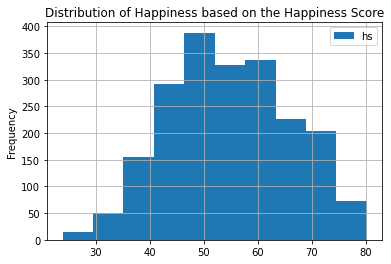

In [34]:
happy_lf.plot(kind="hist", grid=True, title="Distribution of Happiness based on the Happiness Score")

<font color='blue'>Happiness Scores around 47 to 52 a are measured for the majority of years for 90 countries. Only 18 countries experiences Happiness between 74 and 80</font>

In [44]:
#How many countries are in the highest Happyness bin?
mask = (happy_lf['hs'] >= 47) & (happy_lf['hs'] <= 52)
happy_lf[mask]['country'].nunique()

90

In [46]:
#How many countries are in the best ranking happines bin (between around 74 and 80)
mask = (happy_lf['hs'] >= 74) & (happy_lf['hs'] <= 80)
happy_lf[mask]['country'].nunique()

18

### 3.3 Happier or less happy?

To see which countries are happier now then at the start of measurement I simply apply a boolean mask on the 'up' columns wich could be True or False

In [37]:
happy_meta['up']= happy_meta['happy_first_value'] < happy_meta['happy_last_value']
happy_meta[happy_meta['up'] == True].shape

(91, 11)

Many countries are progressing in terms of the Happiness Score. But there are 163 - 91 = 72 which don't.<br>
### 3. 4 Which countries are less happier at last measurement then at first measurement? 

In [38]:
happy_meta_down = happy_meta[happy_meta['up'] == False]
#happy_meta_down.index.tolist()

### 3. 5 Which country holds the all time "high" in terms of Happiness Score?

In [39]:
happy_max_val = happy_meta['happy_max'].max()
happy_meta[happy_meta['happy_max'] == happy_max_val]

hs_mean  happy_max  happy_min  happy_std  happy_medi  happy_abs  \
country                                                                    
Denmark   76.775       80.2       75.1   1.601041       76.45        5.1   

        happy_first_yr  happy_first_value  happy_last_value happy_last_yr  \
country                                                                     
Denmark           2005               80.2              76.4          2021   

            up  
country         
Denmark  False

<AxesSubplot:title={'center':'Happiness Score for Denmark'}, xlabel='year', ylabel='Happiness Score'>

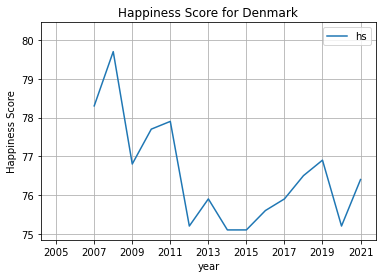

In [40]:
happy_lf[happy_lf['country'] == 'Denmark'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Denmark")

Denmark surpass all other countries which provides data for Happiness Score with 80.2 in 2008

### 3. 6 Which country is the happiest in the world now?

In [41]:
happy_max_last_val = happy_meta['happy_last_value'].max()
happy_meta[happy_meta['happy_last_value'] == happy_max_last_val]

hs_mean  happy_max  happy_min  happy_std  happy_medi  happy_abs  \
country                                                                      
Finland  76.128571       78.9       73.5   1.984722       76.65        5.4   

        happy_first_yr  happy_first_value  happy_last_value happy_last_yr  \
country                                                                     
Finland           2005               76.7              78.2          2021   

           up  
country        
Finland  True

<AxesSubplot:title={'center':'Happiness Score for Finland'}, xlabel='year', ylabel='Happiness Score'>

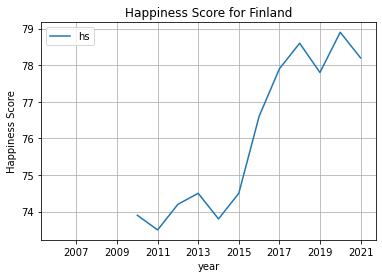

In [42]:
happy_lf[happy_lf['country'] == 'Finland'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Finland")

With a score of 78.2 Finland is happier then all other countries. However Finlands' population used to be happier in 2020 and in 2018.

In [43]:
happy_lf[happy_lf['hs'] >= 78.2]

year  country    hs
680  2005  Denmark  80.2
682  2007  Denmark  78.3
683  2008  Denmark  79.7
846  2018  Finland  78.6
848  2020  Finland  78.9
849  2021  Finland  78.2

Denmark and Finland are regularly the **World Happiness Champions**. But what about Norway and Sweden? Both are Scandinavian countries too. (In fact, Finland does not really count as a Scandinavian country due to their language family which is not Scandinavian)

###  <font color='green'> 3.7 Excursus: Are Scandinavians generally happier people?<font> ####

<AxesSubplot:title={'center':'Happiness Score for Norway'}, xlabel='year', ylabel='Happiness Score'>

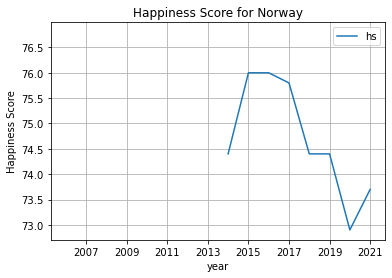

In [44]:
happy_lf[happy_lf['country'] == 'Norway'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Norway")

<AxesSubplot:title={'center':'Happiness Score for Sweden'}, xlabel='year', ylabel='Happiness Score'>

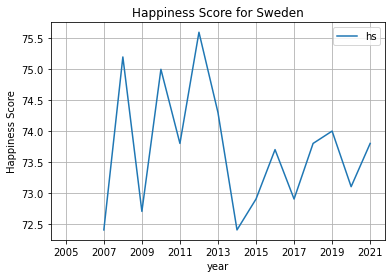

In [45]:
happy_lf[happy_lf['country'] == 'Sweden'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Sweden")

Norway provides data since 2014 and Sweden since 2007. With the last values measured in 2021 at around 73 points, the population of these countries is at least 3 points less happier than the Danish population in 2021 and 5 points less happy than Finland's population in the same year. 

The mean values for Happiness Score in Norway and Sweden are:

In [46]:
print(f"Mean value for Happiness Score in Norway is: {happy_meta.loc['Norway']['hs_mean']}")

Mean value for Happiness Score in Norway is: 74.99090909090908


In [47]:
print(f"Mean value for Happiness Score in Sweden is: {happy_meta.loc['Sweden']['hs_mean']}")

Mean value for Happiness Score in Sweden is: 73.7125


### 3.8 Top 10 of Happy Nations

In [48]:
happy_meta.sort_values(by=['hs_mean'], ascending=False).head(10)

hs_mean  happy_max  happy_min  happy_std  happy_medi  \
country                                                               
Denmark      76.775000       80.2       75.1   1.601041       76.45   
Finland      76.128571       78.9       73.5   1.984722       76.65   
Switzerland  75.445455       77.8       74.6   1.011300       75.10   
Norway       74.990909       76.8       72.9   1.240528       74.40   
Netherlands  74.620000       76.3       73.2   0.814336       74.60   
Iceland      74.600000       75.9       68.9   2.171405       75.10   
Sweden       73.712500       75.6       72.4   0.968074       73.80   
Canada       73.562500       76.5       70.3   1.882507       74.20   
New Zealand  73.026667       76.0       71.9   1.083952       72.80   
Australia    72.740000       74.5       71.4   0.891868       72.60   

             happy_abs happy_first_yr  happy_first_value  happy_last_value  \
country                                                                      
Denmark            5.1           2005               80.2              76.4   
Finland            5.4           2005               76.7              78.2   
Switzerland        3.2           2005               74.7              75.1   
Norway             3.9           2005               74.2              73.7   
Netherlands        3.1           2005               74.6              74.2   
Iceland            7.0           2005               68.9              75.6   
Sweden             3.2           2005               73.8              73.8   
Canada             6.2           2005               74.2              70.3   
New Zealand        4.1           2005               73.0              72.0   
Australia          3.1           2005               73.4              71.6   

            happy_last_yr     up  
country                           
Denmark              2021  False  
Finland              2021   True  
Switzerland          2021   True  
Norway               2021  False  
Netherlands          2021  False  
Iceland              2021   True  
Sweden               2021  False  
Canada               2021  False  
New Zealand          2021  False  
Australia            2021  False

### <font color="green">3.9 Conclusion Excursus:</font> ###

**So the cliché of "ever happy Scandinavians" is true.** Finland and Denmark are regularly Happiness World Champions and Norway and Sweden with mean values for Happiness between 73.5 and nearly 75 are ranking quite high.

### 3. 10 Which country has developed the most regarding HS from first to last value? ###

I prepare a dataset with only those countries included that performs better in the last year measured than in the first year. (['up'] == True)

In [49]:
happy_up_meta = happy_meta[happy_meta['up'] == True]

I add a new column to this dataset *happy_span_first_last* which contains the difference for the HS between **first and last measurement**: the larger the difference, the higher the gain of subjective Happiness of the population.  

In [50]:
happy_up_meta['happy_span_first_last'] = happy_up_meta['happy_last_value'] - happy_up_meta['happy_first_value']
happy_span_max = happy_up_meta['happy_span_first_last'].max()
happy_up_meta[happy_up_meta['happy_span_first_last'] == happy_span_max]

/var/folders/dc/_s98zrpj4d36j7wcmn71r63m0000gn/T/ipykernel_13289/1879171577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_up_meta['happy_span_first_last'] = happy_up_meta['happy_last_value'] - happy_up_meta['happy_first_value']


hs_mean  happy_max  happy_min  happy_std  happy_medi  happy_abs  \
country                                                                      
Nicaragua    56.62       64.8       44.6   5.492228        57.7       20.2   

          happy_first_yr  happy_first_value  happy_last_value happy_last_yr  \
country                                                                       
Nicaragua           2005               44.6              61.6          2021   

             up  happy_span_first_last  
country                                 
Nicaragua  True                   17.0

<AxesSubplot:title={'center':'Happiness Score for Nicaragua'}, xlabel='year', ylabel='Happiness Score'>

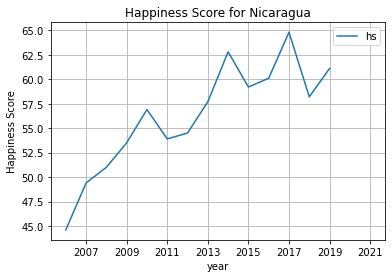

In [51]:
happy_lf[happy_lf['country'] == 'Nicaragua'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Nicaragua")

This is remarkable: The happiness of the Nicaraguan people improves until last year measured (2019) by around 17 points. **Here a furthermore country-specific investigation could be interesting.**

### 3. 11 Which country has the largest difference from lowest to highest value? *("Drama")*  

Which country has the greatest difference between **highest and lowest value** mesdured?  

In [52]:
happy_max_abs_val = happy_meta['happy_abs'].max()
happy_meta[happy_meta['happy_abs'] == happy_max_abs_val]

hs_mean  happy_max  happy_min  happy_std  happy_medi  happy_abs  \
country                                                                      
Venezuela   59.525       74.8       40.4  10.645469        62.0       34.4   

          happy_first_yr  happy_first_value  happy_last_value happy_last_yr  \
country                                                                       
Venezuela           2005               71.7              49.3          2021   

              up  
country           
Venezuela  False

<AxesSubplot:title={'center':'Happiness Score for Venezuela'}, xlabel='year', ylabel='Happiness Score'>

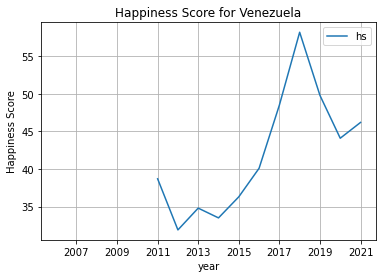

In [53]:
happy_lf[happy_lf['country'] == 'Benin'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Venezuela")

Of all countries Venezuela has the steepest development from the lowest value in 2012 (around 34 HS) to the highest value in 2018 (at around 56 HS) **Here a furthermore country-specific investigation could be interesting with a special focus on the turning point years in 2012 and 2018**

### 3.12 Conclusion EDA of Happiness Score

1. The **Scandinavien countries are** regularily Word Happiness Champion. 
2. 2021 – the most recent datapoint - **Finland** was the happiest nation (Answer to question 3)
3. With a Happiness Score of **80.2 Denmark** used to be the happiest nation since the start of measurement. **(Answer to question 4)**
4. **Nicaragua improves the most** in terms of Happiness with the greatest difference between the first and last measurement. (17 points) **(Answer question 5)**
5. **Venezuela** seems to be the most volatile, most "dramatic" nation in terms of Happiness, with the highest span from the lowest to the highest value of happiness. (34.4 points) **(Answer question 6)**

## 4. Investigating correlations between Happiness Score, Gini and HDI

Here I investigate the **correlation** of **objective values** like HDI and Gini Coefficient on the **subjective value** of Happiness.<br>

For this reason, I will **merge** all three sets. Before that I **drop rows** with missing values. My **"angle-set"** is the happy_meta set which provides data since 2005. Because I will perform an **inner join** to keep only these data which are in line with the Happiness Data (2005 - 2021)

In [54]:
#happy_lf.shape

In [55]:
#Drop all rows with missing data in the Happiness set
happy_lf.dropna(inplace=True)
happy_lf.shape

(2067, 3)

### 4.1 Preparing HDI and Gini Sets like the Happiness set

In [56]:
#pd.DataFrame('hdi_meta')
hdi_meta = hdi_lf.groupby(['country'])['hdi'].mean()
hdi_meta = pd.DataFrame(hdi_meta)
hdi_meta.rename(columns={'hdi':'hdi_mean'}, inplace=True)
hdi_meta['hdi_max'] = hdi_lf.groupby(['country'])['hdi'].max()
hdi_meta['hdi_min'] = hdi_lf.groupby(['country'])['hdi'].min()
hdi_meta['hdi_std'] = hdi_lf.groupby(['country'])['hdi'].std()
hdi_meta['hdi_medi'] = hdi_lf.groupby(['country'])['hdi'].median()
hdi_meta['hdi_abs'] = hdi_lf.groupby(['country'])['hdi'].max() - hdi_lf.groupby(['country'])['hdi'].min()
hdi_meta['hdi_first_yr'] = hdi_lf.groupby(['country'])['year'].first()
hdi_meta['hdi_first_value'] = hdi_lf.groupby(['country'])['hdi'].first()
hdi_meta['hdi_last_value'] = hdi_lf.groupby(['country'])['hdi'].last()
hdi_meta['hdi_last_yr'] = hdi_lf.groupby(['country'])['year'].last()
#hdi_meta.head(2)

In [57]:
gini_meta = gini_lf.groupby(['country'])['gini'].mean()
gini_meta = pd.DataFrame(gini_meta)
gini_meta.rename(columns={'gini':'gini_mean'}, inplace=True)
gini_meta['gini_max'] = gini_lf.groupby(['country'])['gini'].max()
gini_meta['gini_min'] = gini_lf.groupby(['country'])['gini'].min()
gini_meta['gini_std'] = gini_lf.groupby(['country'])['gini'].std()
gini_meta['gini_medi'] = gini_lf.groupby(['country'])['gini'].median()
gini_meta['gini_abs'] = gini_lf.groupby(['country'])['gini'].max() - gini_lf.groupby(['country'])['gini'].min()
gini_meta['gini_first_yr'] = gini_lf.groupby(['country'])['year'].first()
gini_meta['gini_first_value'] = gini_lf.groupby(['country'])['gini'].first()
gini_meta['gini_last_value'] = gini_lf.groupby(['country'])['gini'].last()
gini_meta['gini_last_yr'] = gini_lf.groupby(['country'])['year'].last()
#gini_meta.head(2)

### 4.2 Losing country-rows by dropping nan values and performing an inner merge

In [58]:
#gini_meta.shape

In [59]:
gini_meta.dropna(inplace=True)

In [60]:
#gini_meta.shape

In [61]:
#hdi_meta.shape

In [62]:
hdi_meta.dropna(inplace=True)

In [63]:
#hdi_meta.shape

In [64]:
#happy_meta.shape

In [65]:
happy_meta.dropna(inplace=True)

In [66]:
#happy_meta.shape

Due to the dropping of data, I lost some country rows. I could check which ones. But because I am interested in the overall trend, the little number of countries which are lost in the sets is negligible.

However, after combining both sets …

In [67]:
happy_hdi_combined = happy_meta.merge(hdi_meta, left_on='country', right_on='country', how='inner')

I again lose some data due to the inner merge:

In [68]:
#happy_hdi_combined.shape

In [69]:
#combined = happy_hdi_combined.index.tolist()
#happy_countries = happy_meta.index.tolist()
#diff = set(happy_countries).difference(set(combined))
#diff

Those countries were not included in the HDI set.

In [70]:
#happy_hdi_combined.head(2)

For the sake of coherence, I change the name from hs_mean to happy_mean

In [71]:
happy_hdi_combined.rename(columns= {'hs_mean' : 'happy_mean'}, inplace = True)

In [72]:
happy_hdi_gini_combined = happy_hdi_combined.merge(gini_meta, left_on='country', right_on='country', how='inner')

In [73]:
#happy_hdi_gini_combined.shape

And again, due to the inner merge I lost some country rows that the Gini set does not provide. Please uncomment, when you want to see which countries. 

In [74]:
#combined = happy_hdi_gini_combined.index.tolist()
#happy_countries = happy_meta.index.tolist()
#diff = set(happy_countries).difference(set(combined))
#diff

### 4.3 The correlation of Happiness and HDI

<AxesSubplot:xlabel='hdi_mean', ylabel='happy_mean'>

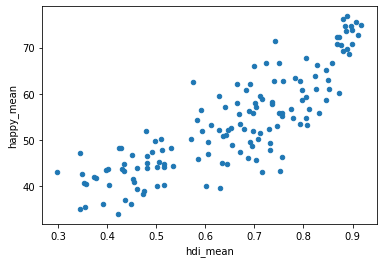

In [75]:
happy_hdi_gini_combined.plot.scatter(x='hdi_mean', y='happy_mean')

HDI and HS are positively correlated. The higher the HDI the stronger the correlation between those values. The values diffuse the most between the 50th and the 75th percentile. To prove this assumption I will divide the combined set into four: from 0 to 24; from 25 to 74 and from 75 to 100 percentile. But first I will check the overall correlation:

In [76]:
corr_hdi_hs = happy_hdi_gini_combined['hdi_mean'].corr(happy_hdi_gini_combined['happy_mean'])
corr_hdi_hs

0.8404999344672814

The overall correlation is indeed quite strong. Indicating that the higher the HDI, the higher the happiness. But does this count for every quartile?

### 4.4 Correlation between HS and HDI in the four quartile ranges

Based on the scatter plot above, **the correlation between HDI and Happiness is not equally distributed over all quartiles**. I will investigate this in more detail. For this reason **I split the combined set into four sets.**

In [77]:
first_quart, second_quart, third_quart, fourth_quart = [group for _, group in happy_hdi_gini_combined.groupby(pd.qcut(happy_hdi_gini_combined['hdi_mean'], 4))]

### First Quartile ranging from 0 to 24th percentile

<AxesSubplot:xlabel='hdi_mean', ylabel='happy_mean'>

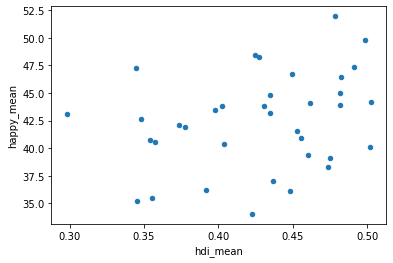

In [78]:
first_quart.plot.scatter(x='hdi_mean', y='happy_mean')

In [79]:
corr_hdi_hs_1qrt = first_quart['hdi_mean'].corr(first_quart['happy_mean'])
corr_hdi_hs_1qrt

0.28463072985921656

In the first quartile, the **HDI ranges from 0.30 to 0.50**. And there is a **slightly positive correlation between HDI and Happiness**. Improvements in this quartile in terms of HDI do **not have much impact on Happiness**. Maybe this is because these improvements do not reach all habitants of a certain nation. Here the investigation of the Gini could be helpful. (next section)

Please uncomment to take a look at these countries. They consist of very different nations ranging from **"Failing states"** like Sierra Leone to **"scarcely industrialized post-colonial states"** like Pakistan.

In [80]:
#first_quart.index.tolist()

### Second Quartile ranging from 25th to 49th percentile

<AxesSubplot:xlabel='hdi_mean', ylabel='happy_mean'>

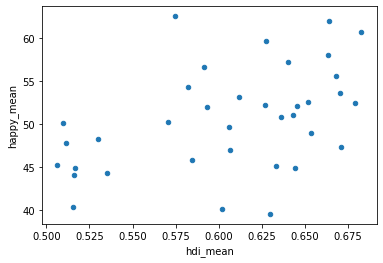

In [81]:
second_quart.plot.scatter(x='hdi_mean', y='happy_mean')

In [82]:
corr_hdi_hs_2qrt = second_quart['hdi_mean'].corr(second_quart['happy_mean'])
corr_hdi_hs_2qrt

0.4500841420969141

The **correlation between HDI and Happiness** from countries in the **second quartile** with an HDI ranging from 0.5 to around 0.7 is **higher** than in the first quartile. But the Happiness Mean ranges from 40 (higher entry level) to 65, surpassing the first quartile of more than 11 points. **So happiness is more stronger correlated with HDI in the 2nd quartile, than in the 1st and 3rd quartiles.** Which countries are in?

In [83]:
#second_quart.index.tolist()

This is interesting: This quartile consists of two of the coming world powers – **China** and **India** – states like **Honduras** which is famous for its high criminality, indicating a powerless state, and **Nicaragua** the state with the highest improvement between first and last year measured for Happiness.

**This could be a subject for further investigation: It could be interesting to investigate the impact of environment, freedom and literacy, especially on countries in this section.**

### Third Quartile ranging from 50th to 74th percentile

<AxesSubplot:xlabel='hdi_mean', ylabel='happy_mean'>

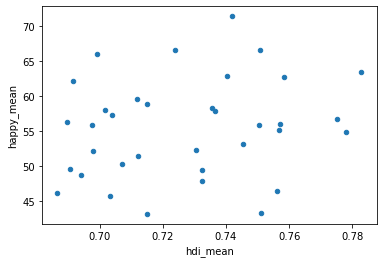

In [84]:
third_quart.plot.scatter(x="hdi_mean", y="happy_mean")

In [85]:
corr_hdi_hs_3qrt = third_quart['hdi_mean'].corr(third_quart['happy_mean'])
corr_hdi_hs_3qrt

0.19560848624358415

That is interesting: **In the third quartile, the correlation between HDI and HS drops.** Which countries are we talking about here?

In [86]:
#third_quart.index.tolist()

The countries are quite different. Most of them are [Hybrid Democratic systems](https://en.wikipedia.org/wiki/Hybrid_regime) – which means, that they are in a transition from a democratic to an authoritarian regime or vice versa. The last year measured is 2021. Some of these countries are facing violence on a daily basis or are involved in a war now (Ukraine). Venezuala is part of the third quartile - the nation with the most "Drama", the greatest difference from Highest to lowest value. **All these countries are developed in economical terms, otherwise, they would not be in this quartile. So they are obviously lacking something other than a long(er) life expectation, high(er) education, and high(er) income, which the HDI measure. This could explain the low correlation of happiness and HDI in this section**

### Fourth Quartile ranging from 75th to 100th percentile

<AxesSubplot:xlabel='hdi_mean', ylabel='happy_mean'>

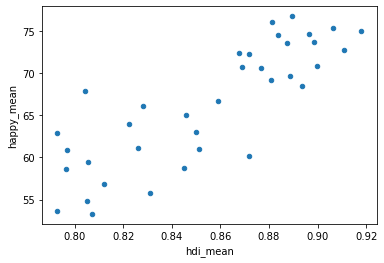

In [87]:
fourth_quart.plot.scatter(x="hdi_mean", y="happy_mean")

In [88]:
corr_hdi_hs_4qrt = fourth_quart['hdi_mean'].corr(fourth_quart['happy_mean'])
corr_hdi_hs_4qrt

0.827274541607356

In [89]:
#fourth_quart.index.tolist()

In the fourth quartile with the highest HDI, the people are the happiest. One explanation could be, that developed countries could also provide other factors of well-being like "stability", "freedom", "clean environment". **However, it would be important to identify hindering factors especially in this section:** <br>We are facing radicalization in politics, escpecially in countries in this section. This is due to a rising discontent with how society develops. If we miss to identify and address these issues, things could go worse.

### 4.5 Conclusion HDI and Happiness Correlation
Happiness and HDI correlate the strongest in the 75th to 100th percentile and the lowest in the above-average to 75th percentile. **A possible conclusion could be, that a relatively high HDI does not compensate for other shortcomings like lack of freedom or a clean environment.** 

Happiness Champions (The To 10) are situated in the fourth HDI Quartile. This means, that economic stability, education, and life expectation plays a crucial role in the Happiness Game. 

You could also frame it, that we turned into "materialists". Could we "boost" happiness by investing far more in families, welcoming societies and inclusive neighborhoods – cherishing values beyond economic stability? 

**To be less vulnerable to economical downfalls is important. Especially for a society in which happiness is so strongly correlated with economic prosperity.**

However further investigation needs to explain the rise of far right parties in Italy, Poland, Sweden, France, and Germany despite a high HDI. 

### 4.6 Gini and Happiness (Overall Correlation)

<AxesSubplot:xlabel='gini_mean', ylabel='happy_mean'>

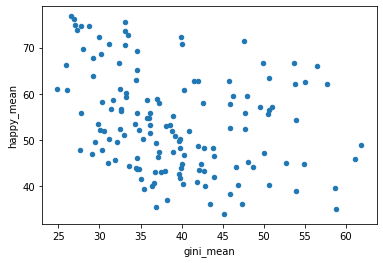

In [90]:
happy_hdi_gini_combined.plot.scatter(x='gini_mean', y='happy_mean')

In [91]:
corr_happy_gini = happy_hdi_gini_combined['gini_mean'].corr(happy_hdi_gini_combined['happy_mean'])
corr_happy_gini

-0.3059548749198262

Happiness score and Gini coefficient seem to be slightly negatively correlated: <br>
**The higher the happiness the lower the Gini coefficient.** This makes intuitive sense because a lesser Gini coefficient means more equality. 

In [92]:
first_quart_gini, second_quart_gini, third_quart_gini, fourth_quart_gini = [group for _, group in happy_hdi_gini_combined.groupby(pd.qcut(happy_hdi_gini_combined['gini_mean'], 4))]

### First Quartile ranging from 25 to 33 Gini Coefficient

#### Gini: Higher equality contributes to Happiness. But could there be too much equality?

<AxesSubplot:xlabel='gini_mean', ylabel='happy_mean'>

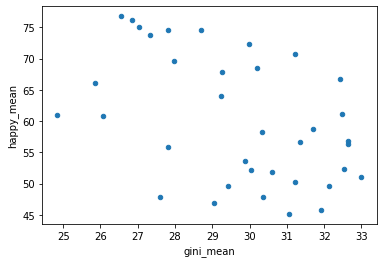

In [93]:
first_quart_gini.plot.scatter(x='gini_mean', y='happy_mean')

In [94]:
corr_gini_hs_1qrt = first_quart_gini['gini_mean'].corr(first_quart_gini['happy_mean'])
corr_gini_hs_1qrt

-0.4666903238954578

In [95]:
#first_quart_gini.index.tolist()

In the countries with the lowest Gini (highest equality), happiness is negatively correlated – which makes sense. (See above). **The Happiness Values range from 45 to 75 – which is a huge span.** But taking into account, that this section consists of different countries like "Sweden", "Iraq" and "Germany" make sense. 

Please also not, that there are countries lacking some data, which could distort the picture. 

**Interestingly Finland and Denmark – the Happiness Champions – are in this section with the most equality.**

<AxesSubplot:title={'center':'Gini Coefficient for Finland'}, xlabel='year', ylabel='Gini Coefficient'>

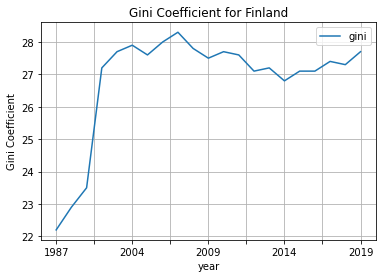

In [96]:
gini_lf.dropna(inplace=True)
gini_lf[gini_lf['country'] == 'Finland'].plot(x ='year', xlabel='year', y ='gini', grid=True, ylabel='Gini Coefficient', kind='line', title="Gini Coefficient for Finland")

<AxesSubplot:title={'center':'Happiness Score for Finland'}, xlabel='year', ylabel='Happiness Score'>

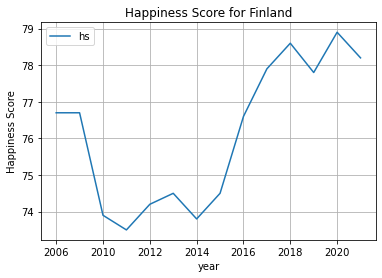

In [97]:
happy_lf[happy_lf['country'] == 'Finland'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for Finland")

It would be very interesting to see how far a higher Gini than now - like in the 80s - would have correlated to Happiness. 

<AxesSubplot:title={'center':'Gini Coefficient for Denmark'}, xlabel='year', ylabel='Gini Coefficient'>

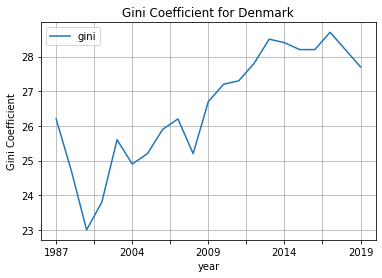

In [98]:
gini_lf.dropna(inplace=True)
gini_lf[gini_lf['country'] == 'Denmark'].plot(x ='year', xlabel='year', y ='gini', grid=True, ylabel='Gini Coefficient', kind='line', title="Gini Coefficient for Denmark")

#### Findings 1nd Quartile
In both countries, the Gini index has risen slightly. Since the 80s. Also, happiness improves. **For me as politically left-aligned this is an interesting insight: Rising inequality (which is indicated by a higher Gini) could contribute to happiness.** Which makes sense: Too much equality and too much inequality may generate "unhappiness". **Is there a threshold value? At which value does the Gini Coefficient contribute to unhappiness and vice versa? This could be a topic for further investigation.**

### Second Quartile ranging from 33 to 38 Gini Coefficient
#### When does Gini start to make you unhappy? Somewhere between 33 - 38.

<AxesSubplot:xlabel='gini_mean', ylabel='happy_mean'>

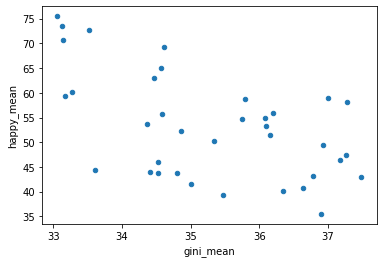

In [99]:
second_quart_gini.plot.scatter(x="gini_mean", y="happy_mean")

In [100]:
corr_gini_hs_2qrt = second_quart_gini['happy_mean'].corr(second_quart_gini['gini_mean'])
corr_gini_hs_2qrt

-0.5495997249699662

In [101]:
#second_quart_gini.index.tolist()

Here we have countries like "Switzerland" and "Algeria". In this quartile, the Happiness Score does not exceed 75 like in the first quartile. But the entry value of 35 is much lower. This could be interpreted as:
**A higher Gini makes people less happy. This indicates a lower Happiness entry Score of 35 in the second quartile compared to 45 in the first quartile.**

**And maybe the threshold value from above is now found by accident: A Gini at 38+ could contribute to unhappiness. Which should be investigated further.**

### Third Quartile ranging from 38 to 44 Gini Coefficient

#### High Gini, less Happy? The decline of Happiness in the USA and the rise of the Gini.

<AxesSubplot:xlabel='gini_mean', ylabel='happy_mean'>

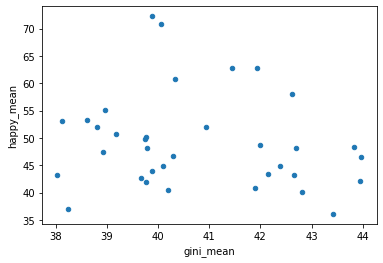

In [102]:
third_quart_gini.plot.scatter(x="gini_mean", y="happy_mean")

In [103]:
corr_gini_hs_3qrt = third_quart_gini['happy_mean'].corr(third_quart_gini['gini_mean'])
corr_gini_hs_3qrt

-0.16036141589652617

In [104]:
#third_quart_gini.index.tolist()

#### Findings 3rd Quartile

In this quartile which includes also very different countries like the US and Chad, Happiness and Gini are **no longer strongly correlated.**
<br>
Maybe this is due to mentality, like a different understanding of "freedom" than for example in Europe. Especially with regard to the US.
This could be an interesting topic for further investigation: **Because the US is far more devoleped in terms of HDI than the other countries in this quartile. But the contribution of wealth is more unequal there than in other "developed" states**
<br>
Anyway: A lower Gini contributes to higher Happiness. And in terms of Happiness, this section does not perfom as good as the first: **More people are unhappy because the Happiness Score here starts at .35 and in the first quartile at .45**

**This is the same finding as in the second quartile.**

<AxesSubplot:title={'center':'Gini Coefficient for USA'}, xlabel='year', ylabel='Gini Coefficient'>

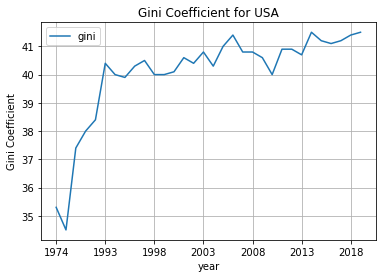

In [105]:
gini_lf.dropna(inplace=True)
gini_lf[gini_lf['country'] == 'United States'].plot(x ='year', xlabel='year', y ='gini', grid=True, ylabel='Gini Coefficient', kind='line', title="Gini Coefficient for USA")

<AxesSubplot:title={'center':'Happiness Score for USA'}, xlabel='year', ylabel='Happiness Score'>

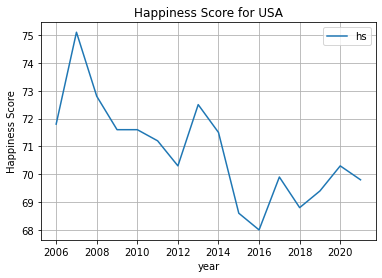

In [106]:
happy_lf[happy_lf['country'] == 'United States'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happiness Score for USA")

Because there are a lot of data for Happines missing - they start at 2016 – **I would not draw any conclusion based on these graphs, that a rising Gini from 35 to 41 contributes to dropping happiness.**
<br>
**But it is quite possible.**

### Fourth Quartile ranging from 45 to 62 Gini Coefficient
#### The higher the Gini the less the correlation to happiness. But what about Nicaragua and Venezuela?

Let's compare the overall correlation between the mean happiness and the Gini in the fourth quartile.

<AxesSubplot:xlabel='gini_mean', ylabel='happy_mean'>

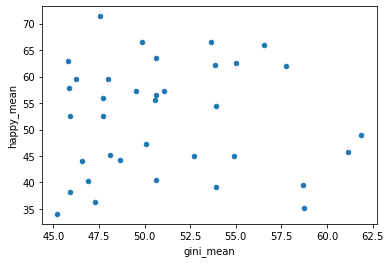

In [107]:
fourth_quart_gini.plot.scatter(x="gini_mean", y="happy_mean")

In [108]:
#fourth_quart_gini.index.tolist()

In [109]:
corr_gini_hs_4qrt = fourth_quart_gini['happy_mean'].corr(fourth_quart_gini['gini_mean'])
corr_gini_hs_4qrt

-0.02307530588121188

In countries with a high Gini (>45), the Happiness Score is less related to equality. Interestingly Venezuela and Nicaragua are the two countries with the highest span between min- and max-value resp. the first year- and last year measured are in this quartile. <br>

<AxesSubplot:title={'center':'Gini Coefficient for Nicaragua'}, xlabel='year', ylabel='Gini Coefficient'>

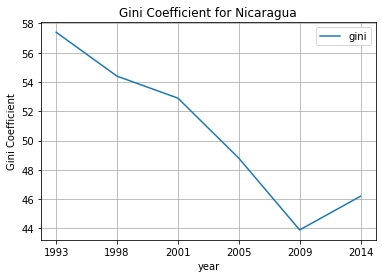

In [110]:
gini_lf[gini_lf['country'] == 'Nicaragua'].plot(x ='year', xlabel='year', y ='gini', grid=True, ylabel='Gini Coefficient', kind='line', title="Gini Coefficient for Nicaragua")

<AxesSubplot:title={'center':'Happy Score for Nicaragua'}, xlabel='year', ylabel='Happiness Score'>

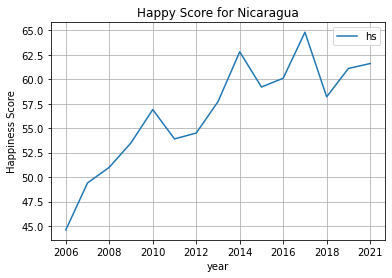

In [111]:
happy_lf[happy_lf['country'] == 'Nicaragua'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happy Score for Nicaragua")

The data for Gini and Happiness Score (Nicaragua) covers different time spans, only sharing the time between 2006 and 2014. However, the plots could indicate that **a decline in Gini leads to higher Happiness.**

In [112]:
#gini_lf[gini_lf['country'] == 'Nicaragua'].plot(x ='year', xlabel='year', y ='gini', grid=True, ylabel='Happiness Score', kind='line', title="Happy Score for Nicaragua")

<AxesSubplot:title={'center':'Gini Coefficient for Venezuela'}, xlabel='year', ylabel='Gini Coefficient'>

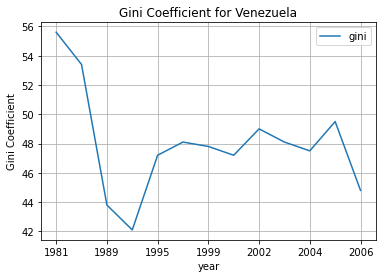

In [113]:
gini_lf[gini_lf['country'] == 'Venezuela'].plot(x ='year', xlabel='year', y ='gini', grid=True, ylabel='Gini Coefficient', kind='line', title="Gini Coefficient for Venezuela")

<AxesSubplot:title={'center':'Happy Score for Venezuela'}, xlabel='year', ylabel='Happiness Score'>

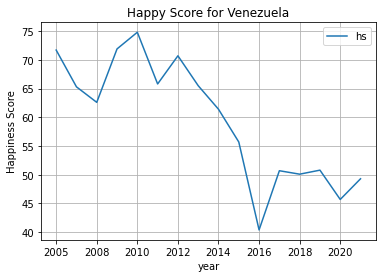

In [114]:
happy_lf[happy_lf['country'] == 'Venezuela'].plot(x ='year', xlabel='year', y ='hs', grid=True, ylabel='Happiness Score', kind='line', title="Happy Score for Venezuela")

The Venezuela data for Happiness and Gini are also **hard to compare**. They only have one year in common – in which happiness drops and equality rises – showing a different behavior than other countries. But – there is a lot of data missing sharing the same time span.

All in all, based on the data for Gini and Happiness, I conclude, that **the sense of happiness of people living in countries with very high inequality is more impacted by other factors than the lack of equality.** 

**This could be the topic for further investigation.**

### 5. Summary: The impact of Gini and HDI on Happiness

1. **The Gini Coefficient could have a higher impact on happiness than the HDI:** A highly developed country like the US and strogly developing countries like China are in the third quartile of Gini Score, **where the happiness drops** compared to the first Gini quartile (less inequality). Also from looking at the graphs depicting the development of Gini in the US and the developing of Happiness, one could conclude that despite of a high HDI, Happiness drops when the Gini rises. But: I am left aligned and biased in a way. **Also the data are hard to compare due to the different times covered.** **(Answer to question one)**
2. A high Gini (fourth quartile) is very slightly correlated with happines. This could indicate, that there are other factors which are more important than distribution of wealth or a satisfied feeling for justice: Maybe more security or a healthier environment could be more important than equality  – in this quartile. (Answer to question 2)

### 6. What's missing?

Keep in mind, that the data are not complete: Depending on the set many data are missing. So the comparison of Gini, Happiness, and HDI is not accurate but hopefully accurate enough to show trends. 

### 7. What's next?

To prevent fascistic, populistic regimes which are a threat to democracy and an obstacle in fighting against climate change a "Happy Nation" could be an answer. 
But as we have seen, within the Top-10 Happy Nations (3.8) we have three countries – Netherlands, Denmark, and Sweden – which could be seen as "problematic" in terms of populism/right drift. So happiness alone may not be the answer.

1. Which factors erode the constructive power of Happiness?
2. But wait, is a "Happy Nation" neccessarily a "constructive nation" – or just enjoying it's happiness, exploiting everyone else? 
3. In how far are threshold values like a Gini between 33 - 38 may contribute to unhappiness – helpful resp. transferable to all countries? (4.6) 
4. Special country surveys for nations facing "populistic threats" could flesh out the picture of "Happiness Factors". These countries could: Hungary, Poland, Italy, the US, Sweden and Brazil. 
5. Is there a substitute for the Happiness Factor? The data reaches only until 2005. It would be great if we could substitute it so that we could go back in history to see how far happiness/lack of happiness drives nations into prosperity or doomed them. Maybe the expenses for culture, the earnings, or the Music Industry could be an indicator. (There is a tax for everything which could be an indicator)

### <font color="blue"> 8. Limitations</font>

<font color="blue">1. All three data sets cover different timespans. So they often have only one year in common. (The HDI starts in the 1980s for some countries; the Gini starts in the late 1960s for some countries; the Happiness starts in 2005 for some countries.)<br>
2. Despite the huge amount of data at the first glance – (measurements since 1967) – there many years are missing. This differs from country to country and from set to set. The most incomplete data are the Gini data.
</font>